### Name: Yashaswi Aryan
### Reg. No.: 200968186
### Batch: IV

## Objectives

#### Main Objective

The objective is to build a Collaborative Recommender systems on MovieLens dataset with 100,000 movie ratings.
These Recommender systems were built using Pandas operations and by fitting KNN and Cosine similarity

User to User and Item to item based collaborative filtering will be the principles I am going to apply. It involves finding similar movies based on inputs from multiple users in the form of ratings.

#### Sub Objectives

- Deciding on the dataset
    - MovieLens 100K dataset has been used for this project. MovieLens is a rating dataset from the MovieLens website, which has been collected over some period.
- Performing EDA on the dataset
- Performing item based Collaborative Recommender System using KNN
    - Performing preprocessing to fit the dataset on the model
    - KNN algorithm is used to determine the corresponding similar movie or a user based on cosine similarity. K value is defined and desired number of nearest neighboring movies/users are returned. 
- Performing user based Collaborative Recommender System using Cosine similarity or correlation
    - Finding users who have similar tastes and preferences, based on the past ratings they have given to the same items
    - The similarity between the users is represented in terms of correlation or cosine similarity
    - Weighted sum of the ratings provided by like-minded users for an item to predict what rating may be provided by a user
- API stack
    - FastAPI is used as it provides benefits of Robustness, quick response, intutive and ease of use

# PHASE - I

### Exploratory Data Analysis

## Metadata

userId: Anonymised ids to represent a user
    movieId: Ids representing movies rated by user & is consistent across `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv`

#### Ratings Data File Structure (ratings.csv):
    It contains:

    userId,movieId,rating,timestamp

    Ratings: made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

    Timestamps: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

#### Tags Data File Structure (tags.csv):
    It contains:

    userId,movieId,tag,timestamp

    Tags: User-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

    Timestamps: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

#### Movies Data File Structure (movies.csv):
    It contains:
    movieId,title,genres

    Movie titles: Entered manually or imported from <https://www.themoviedb.org/>, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

    Genres are:

        * Action
        * Adventure
        * Animation
        * Children's
        * Comedy
        * Crime
        * Documentary
        * Drama
        * Fantasy
        * Film-Noir
        * Horror
        * Musical
        * Mystery
        * Romance
        * Sci-Fi
        * Thriller
        * War
        * Western
        * (no genres listed)
#### Links Data File Structure (links.csv):
    It contains:
    movieId,imdbId,tmdbId

    movieId is an identifier for movies used by <https://movielens.org>.

    imdbId is an identifier for movies used by <http://www.imdb.com>.

    tmdbId is an identifier for movies used by <https://www.themoviedb.org>.

    Use of the resources listed above is subject to the terms of each provider.

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing Datasets

In [2]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head(20)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [3]:
df_ratings.shape

(100836, 4)

In [4]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


This implies that we have total 100836 user ratings in the dataset

* Numerical Features: movieId , userId , rating
* Categorical Features: None
* Alphanumeric Features: None

In [5]:
df_movies = pd.read_csv('movies.csv')
df_movies.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
#df_movies['Year'] = df_movies['title'].str.extract('.\((.)\).*',expand = False)
#df_movies

In [7]:
df_movies.shape

(9742, 3)

In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


* Numerical Features: movieId
* Categorical Features: genres
* Alphanumeric Features: title

In [9]:
df_links = pd.read_csv('links.csv')
df_links.head(20)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [10]:
df_links.shape

(9742, 3)

In [11]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


* Numerical Features: movieId , imdbId, tmdbId
* Categorical Features: None
* Alphanumeric Features: None

Therefore we have 9742 movies in our dataset

In [12]:
df_tags = pd.read_csv('tags.csv')
df_tags.head(20)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [13]:
df_tags.shape

(3683, 4)

In [14]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


- Numerical Features: movieId , userId , timestamp
- Categorical Features: tags
- Alphanumeric Features: None

### Exploration and Visualization 

<AxesSubplot:>

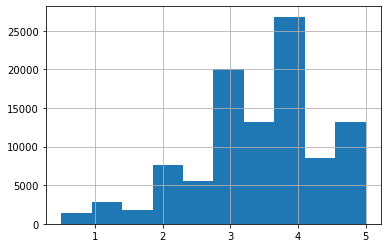

In [15]:
df_ratings['rating'].hist()

In [16]:
#Extracting the year from the Title
df_movies['Year'] = df_movies['title'].str.extract('.*\((.*)\).*',expand = False)
df_movies.head(20)

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
5,6,Heat (1995),Action|Crime|Thriller,1995
6,7,Sabrina (1995),Comedy|Romance,1995
7,8,Tom and Huck (1995),Adventure|Children,1995
8,9,Sudden Death (1995),Action,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995


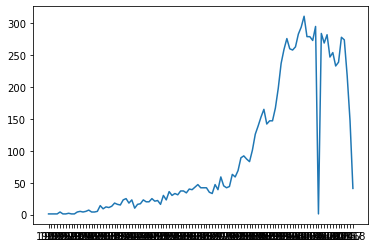

In [17]:
#Ploting a Graph with No.of Movies each Year corresponding to its Year
plt.plot(df_movies.groupby('Year').title.count())
plt.show()

In [18]:
# Visualizing overall ratings by user
groupby_ratings = df_ratings.groupby('userId')

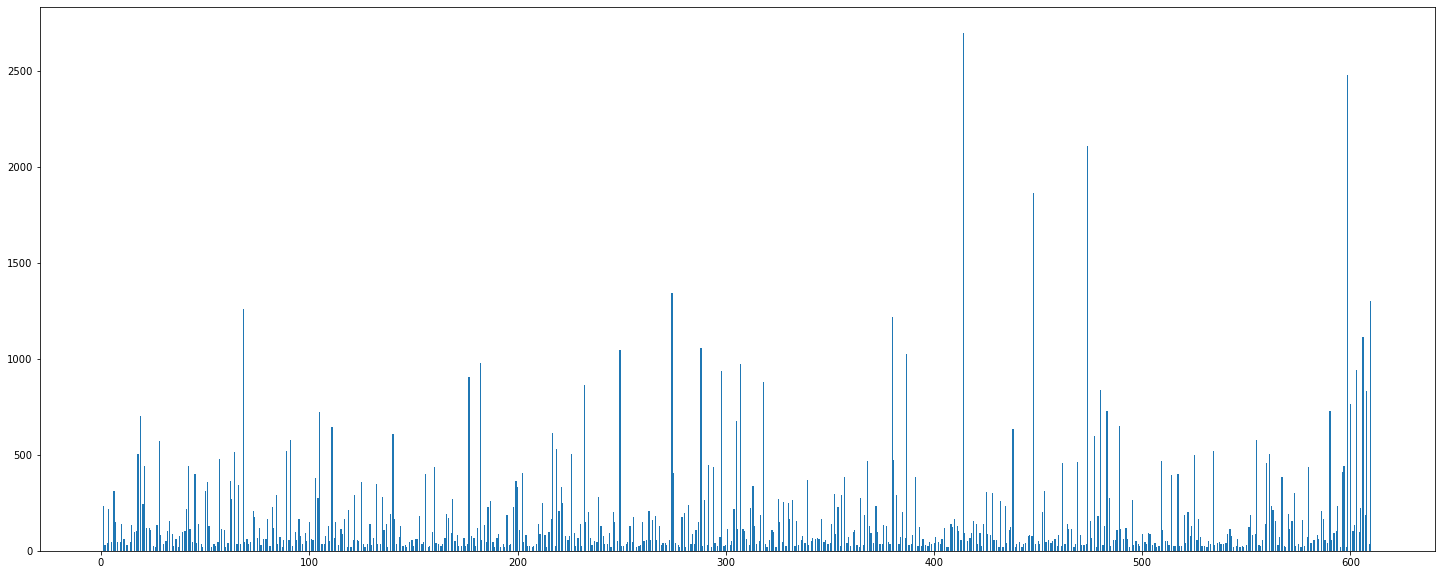

In [19]:
plt.figure(figsize = (25, 10))
plt.hist(x = [df_ratings.userId], bins = 1000)
plt.show()

In [20]:
#Merging ratings and movies datasets
df_mergeRM = pd.merge(df_ratings, df_movies)
del df_mergeRM['timestamp']
df_mergeRM

,userId,movieId,rating,title,genres,Year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
...,...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller,1997
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama,1971
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller,2005
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller,2016


In [21]:
df_mergeRM.isnull().sum()

userId      0
movieId     0
rating      0
title       0
genres      0
Year       17
dtype: int64

In [22]:
#top 50 most rated movies
most_rated = df_mergeRM.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(50)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

In [23]:
df_mergeRM.shape

(100836, 6)

In [24]:
df_mergeRM_grped = df_mergeRM.groupby(['genres'])
df_mergeRM_grped['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
(no genres listed),47.0,3.489362,1.218023,0.5,2.750,3.5,4.5,5.0
Action,186.0,2.935484,1.073579,0.5,2.000,3.0,3.5,5.0
Action|Adventure,555.0,3.706306,1.067343,0.5,3.000,4.0,4.5,5.0
Action|Adventure|Animation,42.0,3.583333,0.854805,2.0,3.000,4.0,4.0,5.0
Action|Adventure|Animation|Children,39.0,3.410256,0.958836,0.5,3.000,3.5,4.0,5.0
...,...,...,...,...,...,...,...,...
Sci-Fi|Thriller,116.0,3.280172,1.011432,0.5,2.875,3.5,4.0,5.0
Sci-Fi|Thriller|IMAX,12.0,3.708333,0.541812,2.5,3.500,4.0,4.0,4.5
Thriller,628.0,3.426752,1.036519,0.5,3.000,3.5,4.0,5.0


In [25]:
df_mergeRM_grped['rating']

In [26]:
def count_word(df, ref_col, ls):
    keyword_count = dict()
    for s in ls: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x : x[1], reverse = True)
    return keyword_occurences, keyword_count

In [27]:
genre_labels = set()
for s in df_mergeRM['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [28]:
# printing many times each of genres occur
occurences, dum = count_word(df_mergeRM, 'genres', genre_labels)
occurences

[['Drama', 41928],
 ['Comedy', 39053],
 ['Action', 30635],
 ['Thriller', 26452],
 ['Adventure', 24161],
 ['Romance', 18124],
 ['Sci-Fi', 17243],
 ['Crime', 16681],
 ['Fantasy', 11834],
 ['Children', 9208],
 ['Mystery', 7674],
 ['Horror', 7291],
 ['Animation', 6988],
 ['War', 4859],
 ['IMAX', 4145],
 ['Musical', 4138],
 ['Western', 1930],
 ['Documentary', 1219],
 ['Film-Noir', 870],
 ['(no genres listed)', 47]]

In [29]:
words = dict()
trunc_occurences = occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]

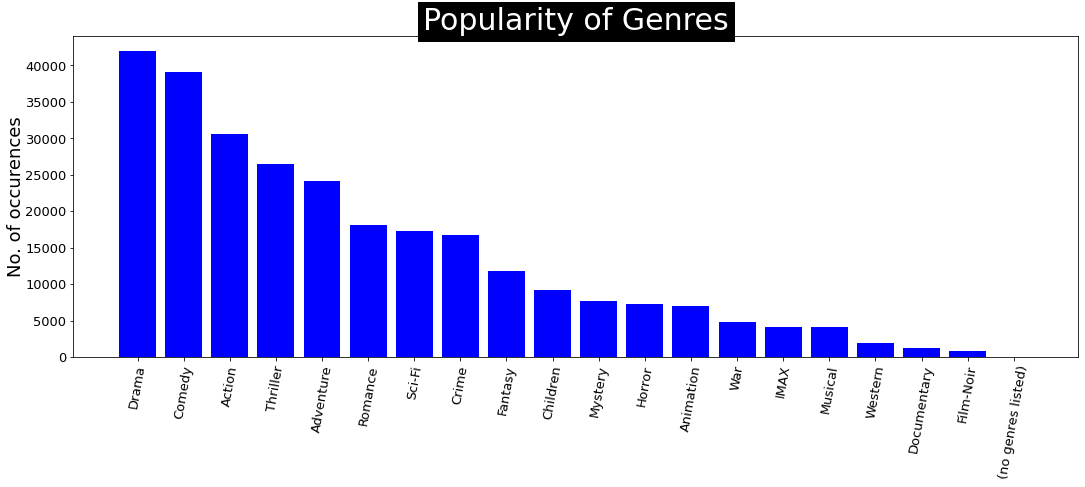

In [30]:
fig = plt.figure(1, figsize=(18, 13))
ax2 = fig.add_subplot(2, 1, 2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k, i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation = 80, fontsize = 13)
plt.yticks(fontsize = 13)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 18, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='b')
plt.title("Popularity of Genres", bbox={'facecolor':'k', 'pad':5}, color='w', fontsize = 30)
plt.show()

#### Year with most Movies Released

In [31]:
df_groupby_year = df_mergeRM.groupby(['Year']).agg('count')
df_groupby_year['title'].idxmax()

'1995'

In [32]:
df_mergeRM_grped['rating'].mean().idxmax()

'Action|Comedy|Drama|Romance'

Movies with genres including 'Action, Comedy, Drama, Romance' have the best mean rating